In [84]:
import cv2
import numpy as np
from PIL import Image as Im
import pathlib
import imageio
from matplotlib import pyplot as plt
from IPython.display import Image, display

Makes the image that we use from a bmp to a png

In [85]:
x=Im.open('C:/Users/sunita-pclily/Documents/hw/2019 spring/BME303/Project/cluster1.bmp','r') #Opens cluster1.bmp and reads it
x=x.convert('L')
y=np.asarray(x.getdata(),dtype=np.float64).reshape((x.size[1],x.size[0])) #Creates an array y with.................

y=np.asarray(y,dtype=np.uint8) #if values still in range 0-255!
w=Im.fromarray(y,mode='L')
w.save('cluster1.png') #Saves cluster1.png

Uses cv2 to find image shape. Then converts to grayscale and displays the image. Then finds the contours for later use.

Original Image Shape: (200, 200, 3)
New Image Shape: (200, 200)


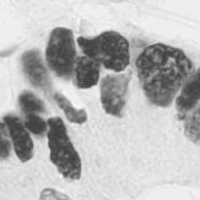

In [86]:
im = cv2.imread('cluster1.png')
print("Original Image Shape:", im.shape) #check if the image is loaded correctly
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
cv2.imwrite('cluster1gray.png', imgray)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(im,contours,-1,(0,255,0),3)
cv2.imwrite('im.png', im)
print("New Image Shape:", imgray.shape)
display(Image(filename = 'cluster1gray.png'))

Creates histogram of the greyscale image. A mean line is printed and it acts as a threshold so whenever a value in he array is over the treshold and then an outline is put there.

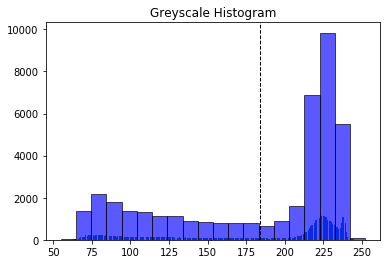

In [89]:
#histogram
im=Im.open("cluster1gray.png")
pxl=list(im.getdata())
columnsize,rowsize=im.size

a = np.array(pxl)
plt.hist(a, bins = 255)

result = plt.hist(a, bins=20, color='b', edgecolor='k', alpha=0.65)
plt.axvline(a.mean(), color='k', linestyle='dashed', linewidth=1)

plt.title("Greyscale Histogram")


plt.show()


This is where the program outlines the actual cells and figures out the centers of the cell and counts it

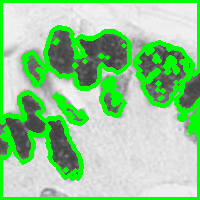

There are 19 cells in the image.


In [90]:
img = cv2.imread('im.png', 0)
seed_pt = (25, 25)
fill_color = 0
mask = np.zeros_like(img)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
for th in range(60, 120):
    prev_mask = mask.copy()
    mask = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)[1]
    mask = cv2.floodFill(mask, None, seed_pt, fill_color)[1]
    mask = cv2.bitwise_or(mask, prev_mask)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
n_centers = cv2.connectedComponents(mask)[0] - 1

display(Image(filename='im.png'))
print('There are %d cells in the image.'%n_centers)